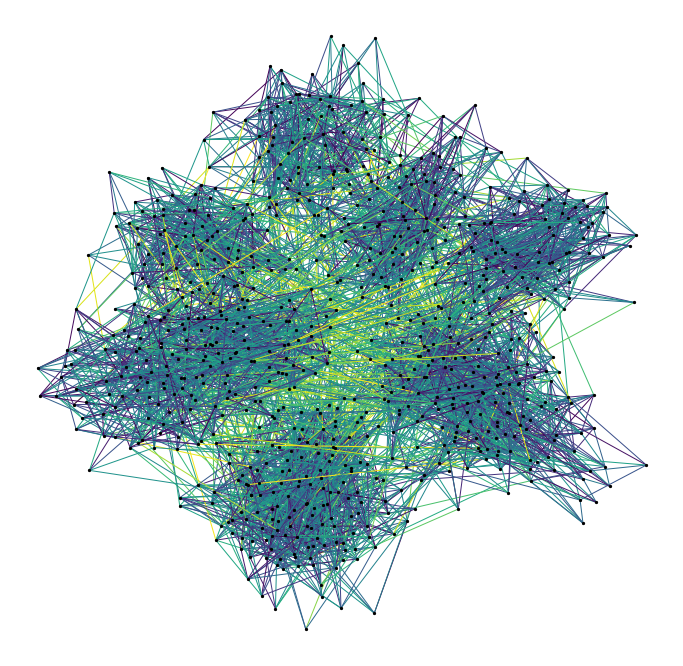

In [1]:
import numpy as np
import time
import networkx as nkx
import matplotlib.pyplot as plt
from annchor.datasets import load_graph_sp

k=15


graph_sp_data = load_graph_sp()
X = graph_sp_data['X']
y = graph_sp_data['y']
neighbor_graph = graph_sp_data['neighbor_graph']
G = graph_sp_data['G']
nx = X.shape[0]

edges,weights = zip(*nkx.get_edge_attributes(G,'w').items())

pos = nkx.spring_layout(G)

fig,ax = plt.subplots(figsize=(12,12))
nkx.draw(G, 
         pos,
         node_color='k',
         node_size=5,
         edgelist=edges,
         edge_color=weights,
         width=1.0,
         edge_cmap=plt.cm.viridis,
         ax=ax)
plt.show()

In [3]:
def sp_dist(i,j):
    return nkx.dijkstra_path_length(G,i,j,weight='w')


randX = lambda : X[np.random.randint(nx)]
%timeit sp_dist(randX(),randX())

4.14 ms ± 437 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
from annchor import BruteForce
from annchor import compare_neighbor_graphs

start_time = time.time()

bruteforce = BruteForce(X,sp_dist)
bruteforce.get_neighbor_graph()

print('Brute Force Time: %5.3f seconds' % (time.time()-start_time))

error = compare_neighbor_graphs(neighbor_graph,
                                bruteforce.neighbor_graph,
                                k)

print('Brute Force Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,error/(k*nx)))

Brute Force Time: 284.280 seconds
Brute Force Accuracy: 0 incorrect NN pairs (0.000%)


In [26]:

from annchor import Annchor

k=15

start_time = time.time()

# Call ANNchor
ann = Annchor(X,
              sp_dist,
              n_anchors=20,
              n_neighbors=k,
              random_seed=5,
              n_samples=5000,
              p_work=0.15,
             verbose=True)

ann.fit()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))


# Test accuracy
error = compare_neighbor_graphs(neighbor_graph,
                                ann.neighbor_graph,
                                k)
print('ANNchor Accuracy: %d incorrect NN pairs (%5.3f%%)' % (error,100*error/(k*nx)))

computing anchors...
get_anchors: 22.530598163604736
computing features...
get_features: 22.61345100402832
computing sample...
get_sample: 26.18302321434021
fitting regression...
fit_predict_regression: 26.3859121799469
fitting errors...
fit_predict_errors: 26.40528893470764
selecting candidate pairs (1)
select_candidate_pairs: 26.505693912506104
refining candidate pairs (1)
refine_approx: 27.9183349609375
selecting candidate pairs (2)
select_candidate_pairs: 28.018128156661987
refining candidate pairs (2)
refine_approx: 31.842099905014038
generating neighbour graph
get_ann: 31.873981952667236
ANNchor Time: 31.876 seconds
ANNchor Accuracy: 1 incorrect NN pairs (0.008%)
